In [1]:
import joblib
import os

df_tvl = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_tvl.pkl")
df_volume = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_volume.pkl")
df_fdv = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_fdv.pkl")

print(df_tvl.head())

print(df_volume.head())

print(df_fdv.head())

                 name pair_reserve_in_usd
0  USDC / USDT 0.001%       19720748.2695
1    WETH / USDT 0.3%       93553747.4921
2        sUSDS / USDT       54064946.8579
3    ETH / USDT 0.05%       32987861.1492
4   DAI / USDC / USDT      194198419.4119
                 name         vol_5m       vol_15m       vol_30m  \
0  USDC / USDT 0.001%  521943.088765  1.554816e+06  1.607242e+06   
1    WETH / USDT 0.3%   61309.645171  2.105788e+05  3.004391e+05   
2        sUSDS / USDT  510768.473620  5.107685e+05  5.107685e+05   
3    ETH / USDT 0.05%    9152.968471  1.109817e+05  2.707673e+05   
4   DAI / USDC / USDT      25.096341  2.509634e+01  2.509634e+01   

         vol_1h        vol_6h       vol_24h  
0  2.491635e+06  7.039804e+07  3.762024e+08  
1  5.124480e+05  7.555309e+06  6.444446e+07  
2  5.774102e+05  1.030488e+07  4.488883e+07  
3  7.600775e+05  7.154643e+06  5.689032e+07  
4  2.509634e+01  4.814415e+06  7.049055e+06  
                 name           fdv_usd
0  USDC / USDT 0.001%  

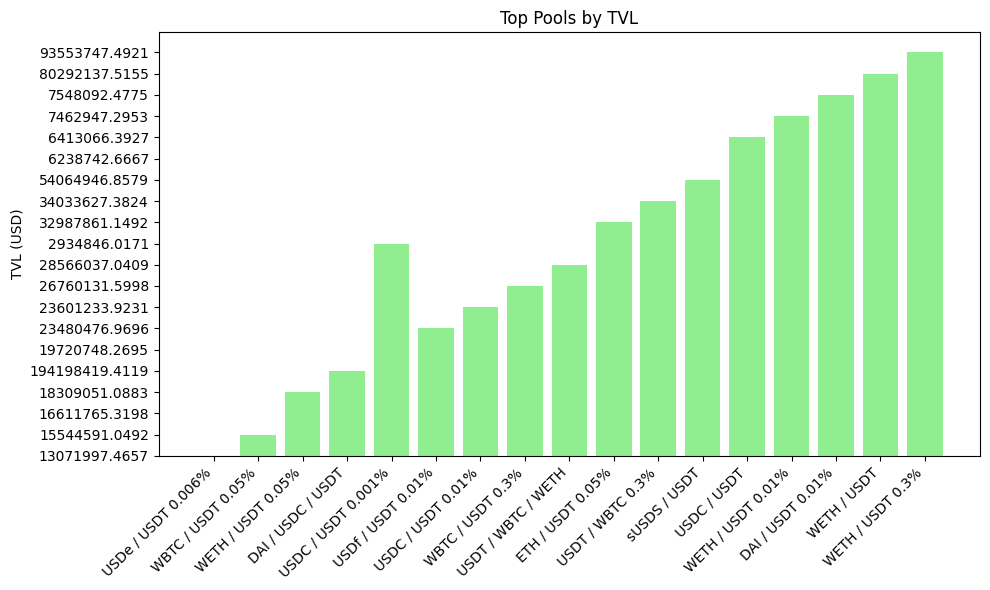

In [2]:
import matplotlib.pyplot as plt
# Sort by TVL (pair_reserve_in_usd) in ascending order
df_sorted = df_tvl.sort_values("pair_reserve_in_usd")

# Plot Top Pools by TVL
plt.figure(figsize=(10,6))
plt.bar(df_sorted["name"], df_sorted["pair_reserve_in_usd"], color="lightgreen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("TVL (USD)")
plt.title("Top Pools by TVL")
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd

# Convert column to numeric (float), ignoring any errors
df_tvl['pair_reserve_in_usd'] = pd.to_numeric(df_tvl['pair_reserve_in_usd'], errors='coerce')

# Now sum the column
total_reserve_usd = df_tvl['pair_reserve_in_usd'].sum()

# Print nicely formatted
print(f"Total reserve in USD: ${total_reserve_usd:,.2f}")

Total reserve in USD: $705,394,467.38


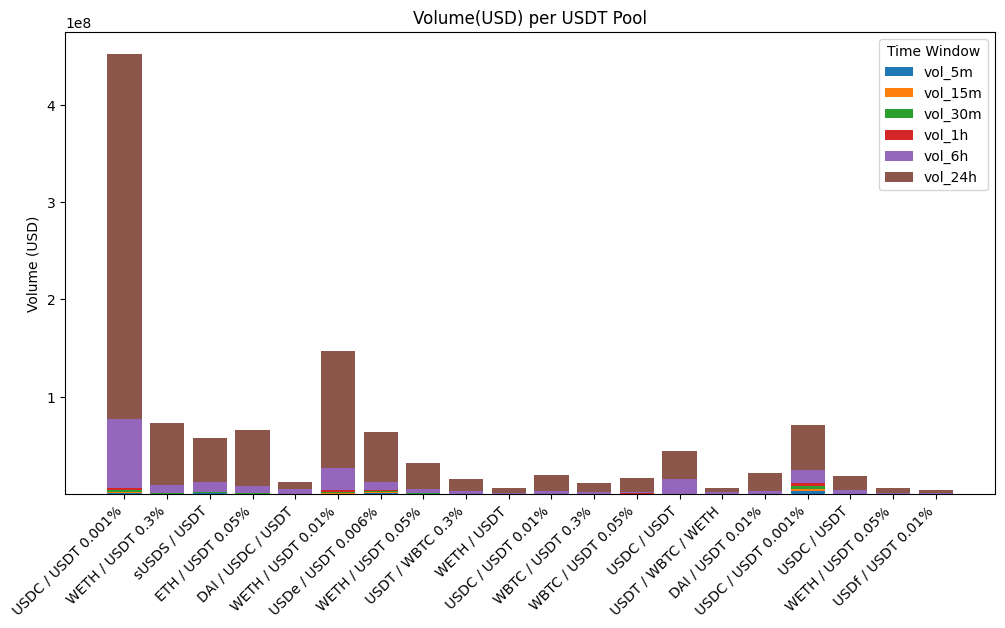

In [4]:
import numpy as np

x = np.arange(len(df_volume['name']))
time_cols = ['vol_5m', 'vol_15m', 'vol_30m', 'vol_1h', 'vol_6h', 'vol_24h']

bottom = np.zeros(len(df_volume))
plt.figure(figsize=(12,6))

for col in time_cols:
    plt.bar(x, df_volume[col], bottom=bottom, label=col)
    bottom += df_volume[col]

plt.xticks(x, df_volume['name'], rotation=45, ha='right')
plt.ylabel("Volume (USD)")
plt.title("Volume(USD) per USDT Pool")
plt.legend(title="Time Window")
plt.show()

In [5]:
cols = ['vol_5m', 'vol_15m', 'vol_30m', 'vol_1h', 'vol_6h', 'vol_24h']

# Convert all columns to numeric
df_volume[cols] = df_volume[cols].apply(pd.to_numeric, errors='coerce')

# Sum all volumes across all pools and time windows
total_volume_usd = df_volume[cols].sum().sum()  # sum per column, then sum all columns

print(f"Total volume in USD: ${total_volume_usd:,.2f}")

Total volume in USD: $1,141,920,423.59


In [6]:
import pandas as pd

# Clean up column names
df_volume.columns = df_volume.columns.str.strip()
df_tvl.columns = df_tvl.columns.str.strip()

# Select relevant columns
vol = df_volume[["name", "vol_24h"]]
tvl = df_tvl[["name", "pair_reserve_in_usd"]]   # <-- replace with your actual reserve column name

# Convert reserve to numeric (force errors to NaN if bad values)
tvl["pair_reserve_in_usd"] = pd.to_numeric(tvl["pair_reserve_in_usd"], errors="coerce")

# Merge
df = pd.merge(vol, tvl, on="name", how="inner")


# Compute turnover ratio safely
df["turnover_ratio"] = df.apply(
    lambda x: x["vol_24h"] / x["pair_reserve_in_usd"] if x["pair_reserve_in_usd"] and x["pair_reserve_in_usd"] > 0 else None,
    axis=1
)

print(df[["name", "vol_24h", "pair_reserve_in_usd", "turnover_ratio"]].head())

                 name       vol_24h  pair_reserve_in_usd  turnover_ratio
0  USDC / USDT 0.001%  3.762024e+08         1.972075e+07       19.076475
1  USDC / USDT 0.001%  3.762024e+08         2.934846e+06      128.184703
2    WETH / USDT 0.3%  6.444446e+07         9.355375e+07        0.688850
3        sUSDS / USDT  4.488883e+07         5.406495e+07        0.830276
4    ETH / USDT 0.05%  5.689032e+07         3.298786e+07        1.724583


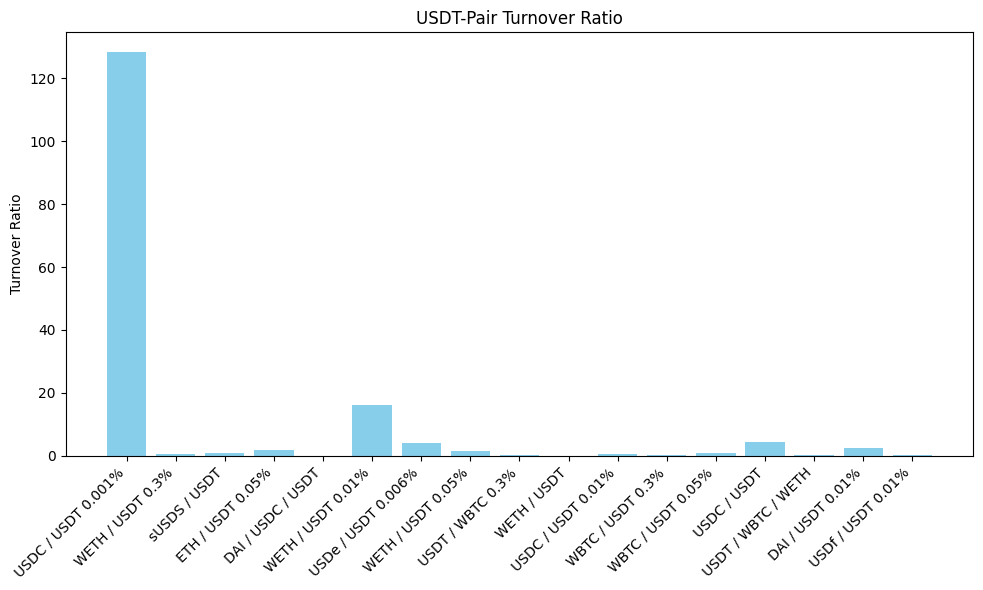

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df["name"], df["turnover_ratio"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Turnover Ratio")
plt.title("USDT-Pair Turnover Ratio")
plt.tight_layout()
plt.show()

In [8]:
df_fdv.columns = df_fdv.columns.str.strip()
df_tvl.columns = df_tvl.columns.str.strip()

vol = df_fdv[["name", "fdv_usd"]]
tvl = df_tvl[["name", "pair_reserve_in_usd"]] 

# Merge on 'name'
df = pd.merge(df_tvl, df_fdv, on="name")

# Ensure numeric types
df["pair_reserve_in_usd"] = pd.to_numeric(df["pair_reserve_in_usd"], errors="coerce")
df["fdv_usd"] = pd.to_numeric(df["fdv_usd"], errors="coerce")

# compute Liquidity Utilization
df["liquidity_utilization"] = df.apply(
    lambda x: x["pair_reserve_in_usd"] / x["fdv_usd"] if x["fdv_usd"] and x["fdv_usd"] > 0 else None,
    axis=1
)

# print selected columns
df[["name", "pair_reserve_in_usd", "fdv_usd", "liquidity_utilization"]].head()

,name,pair_reserve_in_usd,fdv_usd,liquidity_utilization
0,USDC / USDT 0.001%,1.972075e+07,8.174221e+10,0.000241
1,USDC / USDT 0.001%,1.972075e+07,8.156009e+10,0.000242
2,WETH / USDT 0.3%,9.355375e+07,8.154142e+10,0.001147
3,sUSDS / USDT,5.406495e+07,8.158697e+10,0.000663
4,ETH / USDT 0.05%,3.298786e+07,8.174401e+10,0.000404


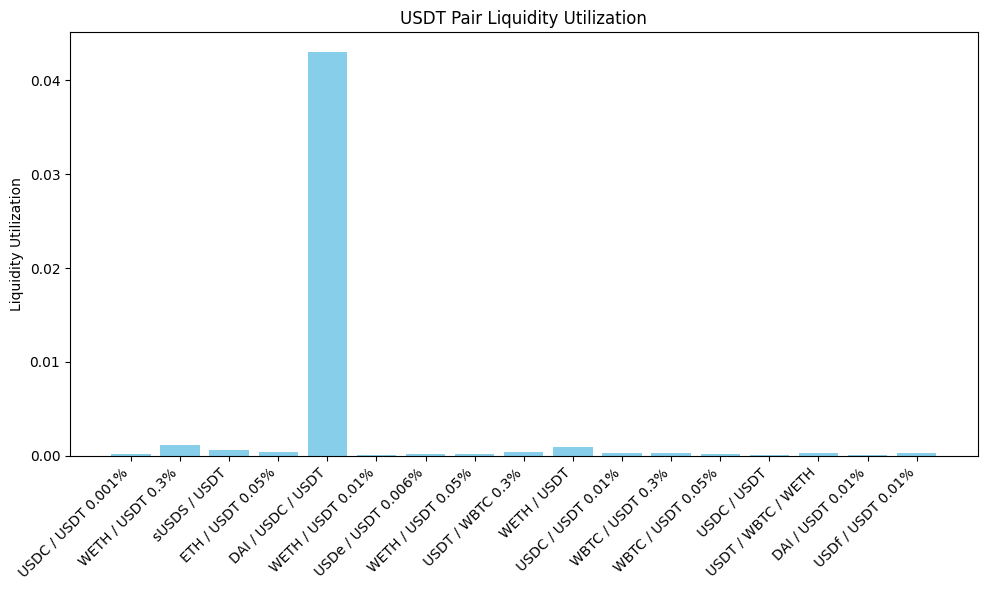

In [9]:
plt.figure(figsize=(10,6))
plt.bar(df["name"], df["liquidity_utilization"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Liquidity Utilization")
plt.title("USDT Pair Liquidity Utilization")
plt.tight_layout()
plt.show()

In [10]:
df_transactions = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_transactions.pkl")

df_transactions.head()

,name,buys_5m,sells_5m,buyers_5m,sellers_5m,buys_15m,sells_15m,buyers_15m,sellers_15m,buys_1h,sells_1h,buyers_1h,sellers_1h,buys_24h,sells_24h,buyers_24h,sellers_24h
0,USDC / USDT 0.001%,3,2,3.0,2.0,26,8,17.0,8.0,67,52,41.0,32.0,1195,964,811.0,631.0
1,WETH / USDT 0.3%,0,5,0.0,5.0,0,8,0.0,8.0,5,17,4.0,17.0,460,503,240.0,205.0
2,sUSDS / USDT,1,0,1.0,0.0,1,0,1.0,0.0,3,1,3.0,1.0,98,92,24.0,20.0
3,ETH / USDT 0.05%,1,3,1.0,3.0,9,11,8.0,9.0,46,49,34.0,30.0,1743,1543,771.0,571.0
4,DAI / USDC / USDT,0,1,NaN,NaN,0,1,NaN,NaN,0,1,NaN,NaN,27,13,NaN,NaN


In [11]:
# Define column groups
buy_cols = ['buys_5m', 'buys_15m', 'buys_1h', 'buys_24h']
sell_cols = ['sells_5m', 'sells_15m', 'sells_1h', 'sells_24h']
buyer_cols = ['buyers_5m', 'buyers_15m', 'buyers_1h', 'buyers_24h']
seller_cols = ['sellers_5m', 'sellers_15m', 'sellers_1h', 'sellers_24h']

# Convert all numeric columns (handles NaN / strings safely)
df_transactions[buy_cols + sell_cols + buyer_cols + seller_cols] = (
    df_transactions[buy_cols + sell_cols + buyer_cols + seller_cols]
    .apply(pd.to_numeric, errors='coerce')
)

# Totals per pool
df_traders = pd.DataFrame({
    "name": df_transactions["name"],
    "total_buys": df_transactions[buy_cols].sum(axis=1),
    "total_sells": df_transactions[sell_cols].sum(axis=1),
    "total_buyers": df_transactions[buyer_cols].sum(axis=1, skipna=True),
    "total_sellers": df_transactions[seller_cols].sum(axis=1, skipna=True),
    # Unique approximation → max across time windows
    "unique_buyers": df_transactions[buyer_cols].max(axis=1, skipna=True),
    "unique_sellers": df_transactions[seller_cols].max(axis=1, skipna=True)
})

df_traders.head()

,name,total_buys,total_sells,total_buyers,total_sellers,unique_buyers,unique_sellers
0,USDC / USDT 0.001%,1291,1026,872.0,673.0,811.0,631.0
1,WETH / USDT 0.3%,465,533,244.0,235.0,240.0,205.0
2,sUSDS / USDT,103,93,29.0,21.0,24.0,20.0
3,ETH / USDT 0.05%,1799,1606,814.0,613.0,771.0,571.0
4,DAI / USDC / USDT,27,16,0.0,0.0,NaN,NaN


In [18]:
df_dex = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_dex.pkl")

df_dex.head(10)

,name,dex
0,USDf / USDT 0.01%,uniswap-v4-ethereum
1,USDf / USDT 0.01%,uniswap_v3
2,USDf / USDT 0.01%,curve
3,USDf / USDT 0.01%,uniswap-v4-ethereum
4,USDf / USDT 0.01%,curve
5,USDf / USDT 0.01%,uniswap_v3
6,USDf / USDT 0.01%,uniswap-v4-ethereum
7,USDf / USDT 0.01%,uniswap_v3
8,USDf / USDT 0.01%,uniswap-v4-ethereum
9,USDf / USDT 0.01%,uniswap_v2


In [19]:
df_pools = joblib.load(r"/home/realist/projects/DexTracker/backend/Database/USDT-pairs_pools.pkl")

df_pools.head(10)

,id,name,pool_created_at,address,pool_age_days,fee
0,eth_0x8aa4e11cbdf30eedc92100f4c8a31ff748e201d4...,USDC / USDT,2025-04-01 02:10:47+00:00,0x8aa4e11cbdf30eedc92100f4c8a31ff748e201d44712...,148,0.001%
1,eth_0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,WETH / USDT,2021-12-29 12:36:12+00:00,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,1336,0.3%
2,eth_0x00836fe54625be242bcfa286207795405ca4fd10,sUSDS / USDT,2025-04-18 22:52:10+00:00,0x00836fe54625be242bcfa286207795405ca4fd10,130,NaN
3,eth_0x72331fcb696b0151904c03584b66dc8365bc63f8...,ETH / USDT,2025-01-27 22:08:23+00:00,0x72331fcb696b0151904c03584b66dc8365bc63f8a144...,211,0.05%
4,eth_0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,DAI / USDC / USDT,2022-07-13 11:48:12+00:00,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,1141,NaN
5,eth_0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,WETH / USDT,2022-12-26 04:38:06+00:00,0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b,975,0.01%
6,eth_0xaae9da4a878406eb1de54efac30e239fd56d54fb...,USDe / USDT,2025-08-04 13:21:23+00:00,0xaae9da4a878406eb1de54efac30e239fd56d54fb8051...,22,0.006%
7,eth_0x11b815efb8f581194ae79006d24e0d814b7697f6,WETH / USDT,2021-12-29 12:35:27+00:00,0x11b815efb8f581194ae79006d24e0d814b7697f6,1336,0.05%
8,eth_0x20c3a15e34e5d88aeba004b0753af69e4f6bea80...,USDT / WBTC,2025-02-01 16:49:47+00:00,0x20c3a15e34e5d88aeba004b0753af69e4f6bea80eae2...,206,0.3%
9,eth_0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,WETH / USDT,2021-10-11 01:35:32+00:00,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,1416,NaN


In [16]:
# Merge pools with their DEX
df_pools_dex = pd.merge(df_pools, df_dex, on="name", how="left")

# Count number of pools per DEX
dex_counts = df_pools_dex.groupby('dex').size().reset_index(name='num_pools')

dex_counts

,dex,num_pools
